In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

Case (a): The value calculated by euler method is -3.0454844895509754 and the exact value is -3.0474258731775667 and the error is -0.001941383626591353


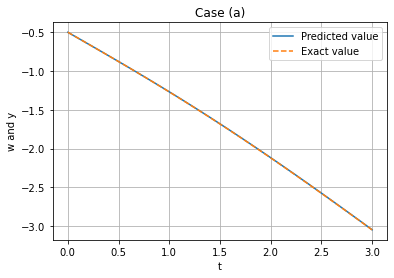

Case (b): The value calculated by euler method is -3.9999999999999583 and the exact value is -4 and the error is -4.1744385725905886e-14


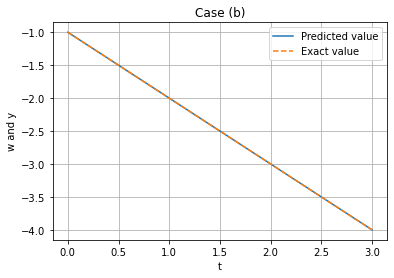

In [10]:
#Q1. y1 is the function in part (a) when initial value is -0.5
#    y2 is the function in part (b) when initial value is -1


def y1(t):
    return -t-1/(1+m.exp(t))

def f(y, t):
    return -(1 + t + t**2)- (2*t + 1)*y - y**2

def y2(t):
    return -t-1

def euler(t0, tn, h, func_y):
    w = func_y(t0)
    n = int((tn-t0)/h)
    t = np.linspace(t0, tn, n+1)
    yi = np.array([func_y(i*h +t0) for i in range(n+1)])
    wi = np.zeros(n+1)
    wi[0] = yi[0]
    for i in range(1, n+1):
        w += h*f(w,(i-1)*h+t0)
        wi[i] = w
    
    return w, wi, yi, t
t0, tn, h1, h2 = 0, 3, 0.05, 0.01
w1, wi1, yi1, ti1 = euler(t0, tn, h1, y1)
w2, wi2, yi2, ti2 = euler(t0, tn, h2, y2)
print(f'Case (a): The value calculated by euler method is {w1} and the exact value is {y1(3)} and the error is {y1(3) - w1}')

plt.plot(ti1, wi1, '-', label = f'Predicted value')
plt.plot(ti1, yi1, '--', label = f'Exact value')
plt.legend()
plt.title("Case (a)")
plt.xlabel(xlabel= 't')
plt.ylabel(ylabel = 'w and y')
plt.grid(True)
plt.savefig('1(a).png')
plt.show()

print(f'Case (b): The value calculated by euler method is {w2} and the exact value is {y2(3)} and the error is {y2(3) - w2}')

plt.plot(ti2, wi2, label = f'Predicted value')
plt.plot(ti2, yi2, '--', label = f'Exact value')
plt.legend()
plt.title("Case (b)")
plt.xlabel(xlabel= 't')
plt.ylabel(ylabel = 'w and y')
plt.grid(True)
plt.savefig('1(b).png')
plt.show()


[ 2.44007384  2.44014917  2.44022601  2.44030441  2.44038438  2.44046597
  2.44054919  2.4406341   2.44072072  2.44080908  2.44089922  2.44099118
  2.44108499  2.4411807   2.44127833  2.44137793  2.44147954  2.44158319
  2.44168894  2.44179681  2.44190686  2.44201913  2.44213367  2.44225051
  2.44236971  2.44249131  2.44261536  2.44274191  2.44287102  2.44300273
  2.44313709  2.44327416  2.443414    2.44355666  2.4437022   2.44385067
  2.44400213  2.44415666  2.44431429  2.44447511  2.44463917  2.44480655
  2.4449773   2.44515149  2.4453292   2.44551049  2.44569545  2.44588413
  2.44607663  2.44627301  2.44647335  2.44667774  2.44688625  2.44709897
  2.44731599  2.44753739  2.44776326  2.44799369  2.44822878  2.44846861
  2.44871328  2.4489629   2.44921756  2.44947737  2.44974242  2.45001283
  2.4502887   2.45057015  2.45085729  2.45115023  2.45144909  2.45175399
  2.45206506  2.45238241  2.45270619  2.45303651  2.45337351  2.45371732
  2.45406809  2.45442596  2.45479107  2.45516356  2

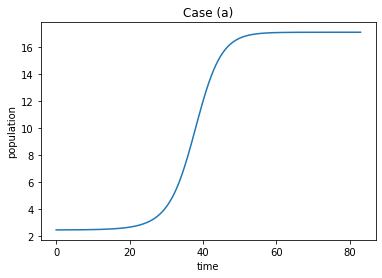

In [41]:
#Q2.

def f(x, r, k):
    return r*x*(1-x/k) - x**2/(1+x**2)

def euler(t0, h, w0, r, k, e):
    w = w0
    i = 0
    wi = np.array([])
    ti = np.array([])
    while True:
        w += h*f(w, r, k)
        
        wi = np.insert(wi, len(wi),  w)
        ti = np.append(ti, i * h + t0)
        i += 1
        if abs(f(w, r, k)) < e:
            break
    return w, i*h + t0, wi, ti

r = 0.4
k = 20
w0 = 2.44
e = 10e-6
w_f1, i1, wi1, ti1= euler(0, 0.1, w0, r, k, e)

w0_1 = 2.40
w_f2, i2, wi2, ti2= euler(0, 0.1, w0_1, r, k, e)

plt.plot(ti1, wi1)
plt.xlabel('time')
plt.ylabel('population')
plt.title('Case (a)')
# print(f"At time {i1}, the population level became constant with the value {w_f1} when initial population was {w0}\n")
# print(f"At time {i2}, the population level became constant with the value {w_f2} when initial population was {w0_1}")
print(wi1)
plt.savefig('2a.png')

In time 21.0 seconds, the plate reaches equilibrium with the error of 1e-06 in the slope of the T wrt time whem it reaches zero. The final Temparature is 1499.9999990461863 K.


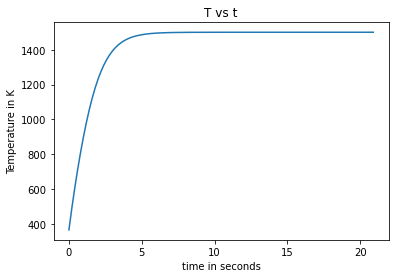

In [44]:
#Q3.

def Cp(T):
    return 0.162*T +446.47

def f(T, Tf, C, sigma, rho, d):
    return 2*sigma*(Tf**4 - T**4)/(rho*d*(C + T * 0.162))

def RK4(t0, h, w0, e):
    i = 0
    w = w0
    wi = np.array([])
    ti = np.array([])
    while True:
        t_curr = i*h +t0
        ti = np.append(ti, t_curr);
        k1 = h * f(w, 1500, Cp(w), 5.67*10e-8, 7900, 0.002)
        k2 = h * f(w+k1/2, 1500, Cp(w), 5.67*10e-8, 7900, 0.002)
        k3 = h * f(w+k2/2, 1500, Cp(w), 5.67*10e-8, 7900, 0.002)
        k4 = h * f(w+k3, 1500, Cp(w), 5.67*10e-8, 7900, 0.002)
        w += (k1+2*k2+2*k3+k4)/6
        wi = np.append(wi, w)
        i += 1
        
        if f(w, 1500, Cp(w), 5.67*10e-8, 7900, 0.002) < e:
            break
    
    return i, w, wi, ti

t0, h, w0 = 0, 0.1, 300
e = 1e-6
i, w, wi3, ti3 = RK4(t0, h, w0, e) 

plt.plot(ti3, wi3)
plt.xlabel('time in seconds')
plt.ylabel('Temperature in K')
plt.title('T vs t')
plt.savefig('3.png')
print(f'In time {t0 + i * h} seconds, the plate reaches equilibrium with the error of {e} in the slope of the T wrt time whem it reaches zero. The final Temparature is {w} K.')

Theoretical Value = 216.00077160493828

By RK2,
	Estimated value at t = 6 is 216.02056533871982 and error %age is 0.009163732904502198%
By RK4,
	Estimated value at t = 6 is 216.00077275622138 and absolute error is 5.329995315751851e-07%


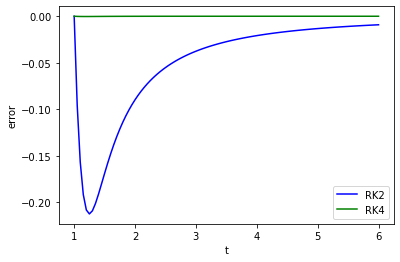

In [11]:
#Q4.

def f(y, t):
    return 7*t**2 - 4*y/t

def y(t):
    return t**3 + 1/t**4

def RK2(t0, tn, h, func_y):
    w = y(t0)
    n = int((tn-t0)/h)
    t = np.linspace(t0, tn, n+1)
    yi = np.array([func_y(i*h +t0) for i in range(n+1)])
    wi = np.zeros(n+1)
    wi[0] = yi[0]
    for i in range(1, n+1):
        t_curr = i*h +t0
        k1 = h * f(w, t_curr-h)
        k2 = h * f(w+k1, t_curr )
        w += 0.5*(k1+k2)
        wi[i] = w
        
    return w, wi, yi, t

def RK4(t0, tn, h, func_y):
    w = y(t0)
    n = int((tn-t0)/h)
    t = np.linspace(t0, tn, n+1)
    yi = np.array([func_y(i*h +t0) for i in range(n+1)])
    wi = np.zeros(n+1)
    wi[0] = yi[0]
    for i in range(1, n+1):
        t_curr = i*h +t0
        k1 = h * f(w, t_curr-h)
        k2 = h * f(w+k1/2, t_curr - h/2)
        k3 = h * f(w+k2/2, t_curr - h/2)
        k4 = h * f(w+k3, t_curr)
        w += (k1+2*k2+2*k3+k4)/6
        wi[i] = w
        
    return w, wi, yi, t

print(f'Theoretical Value = {y(6)}\n')
w_2, wi_2, yi_2, t_2 = RK2(1, 6, 0.05, y)
print(f'By RK2,\n\tEstimated value at t = 6 is {w_2} and error %age is {abs((w_2 - y(6))/y(6))*100}%')
plt.plot(t_2, (yi_2-wi_2)*100/yi_2, color = 'b', label = 'RK2')

w_4, wi_4, yi_4, t_4 = RK4(1, 6, 0.05, y)
print(f'By RK4,\n\tEstimated value at t = 6 is {w_4} and absolute error is {abs((w_4 - y(6))/y(6))*100}%')
plt.plot(t_4, (yi_4 - wi_4)*100/yi_4, '-', color = 'g', label = 'RK4')

plt.xlabel(xlabel= 't')
plt.ylabel(ylabel= 'error')
plt.legend()
plt.savefig('./4.png')

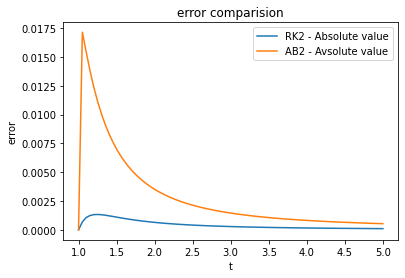

In [64]:
def f5(t, y):
    return y**2-y/t

def y5(t):
    return -1/(t*m.log(2*t))

def RK2_5(t0, tn, h):
    w = y5(t0)
    n = int((tn-t0)/h)
#     t = np.linspace(t0, tn, n+1)
    yi = np.array([y5(i*h +t0) for i in range(n+1)])
    wi = np.zeros(n+1)
    wi[0] = yi[0]
    for i in range(1, n+1):
        t_curr = i*h +t0
        k1 = h * f5((i-1)*h+t0,wi[i-1])
        k2 = h * f5(i*h+t0,wi[i-1]+k1)
        wi[i] = wi[i-1]+0.5*(k1+k2)
#         wi[i] = w
        
    return wi, yi

def AB2(t0, tn, h):
    n = int((tn-t0)/h)
    yi = np.zeros(n+1)
    yi[0] = y5(t0)
    yi[1] = yi[0] + h * f5(t0, yi[0])
    for i in range(1,n):
        t_curr = t0 + i*h
        yi[i+1] = yi[i] + h*(3*f5(t_curr, yi[i]) - f5(t_curr - h, yi[i-1]))/2
        yi[i+1] = yi[i] + h*(f5(t_curr+h, yi[i+1]) + f5(t_curr, yi[i]))/2
    
    return yi

# print(RK2_5)
# print(AB2(1, 5, 0.005, y5))
# y5(1)

wi = AB2(1, 5, 0.05)
yi = RK2_5(1, 5, 0.05)[1]
wi2 = RK2_5(1, 5, 0.05)[0]
wi.shape
ti = np.linspace(1, 5, 81)
# plt.plot(ti, wi)
# plt.plot(ti, wi)
plt.plot(ti, yi - wi2, label = 'RK2 - Absolute value')
plt.plot(ti, wi - yi, label = 'AB2 - Avsolute value')
# plt.plot(ti, wi2- yi)
plt.xlabel('t')
plt.ylabel('error')
plt.title('error comparision')
plt.legend()
plt.savefig('5.png')

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

array([[ 0.00000000e+00,  5.00000000e-01],
       [ 1.00000000e-01,  5.07804475e-01],
       [ 2.00000000e-01,  5.10944041e-01],
       [ 3.00000000e-01,  5.09025940e-01],
       [ 4.00000000e-01,  5.01680521e-01],
       [ 5.00000000e-01,  4.88557955e-01],
       [ 6.00000000e-01,  4.69322951e-01],
       [ 7.00000000e-01,  4.43648114e-01],
       [ 8.00000000e-01,  4.11206817e-01],
       [ 9.00000000e-01,  3.71666739e-01],
       [ 1.00000000e+00,  3.24685600e-01],
       [ 1.10000000e+00,  2.69911107e-01],
       [ 1.20000000e+00,  2.06987802e-01],
       [ 1.30000000e+00,  1.35574408e-01],
       [ 1.40000000e+00,  5.53762276e-02],
       [ 1.50000000e+00, -3.38019936e-02],
       [ 1.60000000e+00, -1.31977333e-01],
       [ 1.70000000e+00, -2.38880661e-01],
       [ 1.80000000e+00, -3.53821565e-01],
       [ 1.90000000e+00, -4.75539631e-01],
       [ 2.00000000e+00, -6.02072397e-01],
       [ 2.10000000e+00, -7.30688984e-01],
       [ 2.20000000e+00, -8.57948268e-01],
       [ 2.

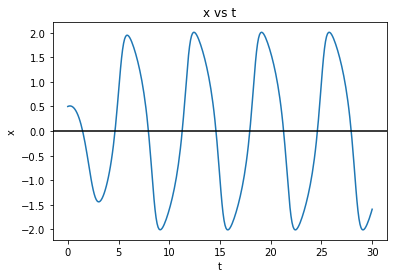

In [104]:
uo = np.array([[0.5, 0.1]])

def fu(u):
    a = np.array([u[1], -u[0] + (1 - u[0]**2) * u[1]])
    return a

def RK4_7(uo, h, to, tn):
    n = int((tn - to)/h)
    xi = np.linspace(to, tn, n+1)
    xi.reshape((n+1, 1))
    yi = np.zeros((n+1, 2))
    yi[0] = uo
    for i in range(1, n+1):
        k1 = h * fu(yi[i-1])
        k2 = h * fu(yi[i-1] + k1/2)
        k3 = h * fu(yi[i-1] + k2/2)
        k4 = h * fu(yi[i-1] + k3)
#         print(k1.shape, k2.shape, k3.shape, k4.shape)
        yi[i] = yi[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return xi,yi

xi, yi = RK4_7(uo, 0.1, 0, 30)
plt.plot(xi, yi.T[0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('x vs t')
plt.axhline(0, color = 'k')
plt.savefig('7.png')
a = xi.size

c = np.hstack((xi.reshape((a, 1)),yi.T[0].reshape((a, 1))))
c
# xi

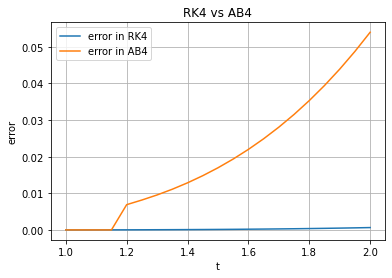

In [74]:
a = np.array([1, 1.05 ,1.1  ,1.15 ,1.2  ,1.25 ,1.3  ,1.35 ,1.4  ,1.45 ,1.5  ,1.55 ,1.6  ,1.65 ,1.7  ,1.75 ,1.8  ,1.85 ,1.9  ,1.95, 2]
)
b = np.array([[0          ,            0],[4.16975e-06,                    0],[9.76241e-06,                    0],[1.69738e-05,                    0],[2.6012e-05 ,                    0.00689963],[3.70976e-05,                    0.00816472],[5.04642e-05,                    0.0095532],[6.63581e-05,                    0.0111155],[8.50392e-05,                    0.0128638],[0.000106781,                    0.0148114],[0.00013187 ,                    0.0169731],[0.000160608,                    0.0193641],[0.000193309,                    0.0220002],[0.000230305,                    0.0248979],[0.00027194 ,                    0.0280741],[0.000318574,                    0.0315462],[0.000370582,                    0.0353323],[0.000428356,                    0.0394511],[0.000492301,                    0.0439218],[0.000562842,                    0.0487641], [0.000640419,                     0.0539983]])
b.shape
plt.plot(a, b.T[0], label = 'error in RK4')
plt.plot(a, b.T[1], label = 'error in AB4')
plt.xlabel('t')
plt.ylabel('error')
plt.title('RK4 vs AB4')
plt.legend()
plt.grid()
plt.savefig('6.png')